

## Project: Identification of Fake Currency Notes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

#Import supplementary visualization code visuals.py

from vpython import *
import visuals as vs


# Display all visuals inline
%matplotlib inline

# Load the Banknote Authentication dataset
data = pd.read_csv("banknote_authentication.csv")
display(data.head(n=6))

classes = data['class']
features = data.drop('class', axis=1)

<IPython.core.display.Javascript object>

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0
5,4.36840,9.6718,-3.9606,-3.16250,0


In [2]:
# autoreload for automatically reloading changes made in visuals.py
%load_ext autoreload
%autoreload 2

----
## Exploratory Data Analysis

In [3]:
n_records = len(data)
n_fake_notes = len(data[data['class'] == 0])
n_real_notes = len(data[data['class'] == 1])
#print "Total number of records: {}".format(n_records)
print('Total number of rocords:', len(data.index))
#print "Total number of fake notes: {}".format(n_fake_notes)
print('Total number of fake notes:', len(data[data['class'] == 0]))
#print "Total number of real notes: {}".format(n_real_notes)
print('Total number of real notes:', len(data[data['class'] == 1]))
missing_values = data.isnull().sum().sum()
if missing_values == 0:
    print("\nThere are no missing values in the dataset")
else:
    print("\nThe dataset has {} missing values".format(missing_values))

Total number of rocords: 1372
Total number of fake notes: 762
Total number of real notes: 610

There are no missing values in the dataset


In [4]:
print('Row count is:', len(data.index))

Row count is: 1372


### Statistical Analysis of Features

In [5]:
display(data.describe())

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Looking for Skewedness in Continuous Features

In [6]:
 import tkinter
from tkinter import *

<AxesSubplot:xlabel='variance', ylabel='Density'>

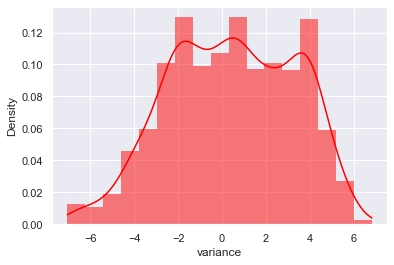

In [7]:

sns.set_theme(); 
x = data['variance']
sns.histplot(x, color="red", label="variance", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='skewness', ylabel='Density'>

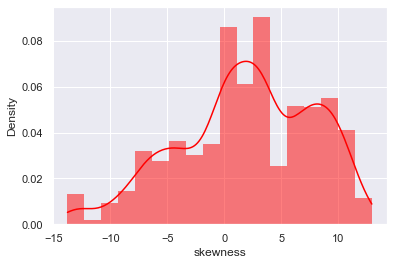

In [8]:
sns.set_theme(); 
x = data['skewness']
sns.histplot(x, color="red", label="variance", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='kurtosis', ylabel='Density'>

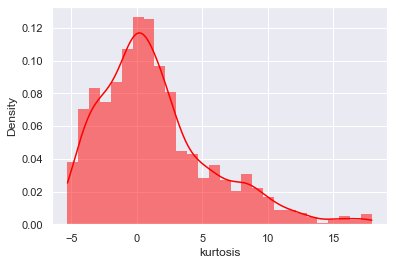

In [9]:
sns.set_theme(); 
x = data['kurtosis']
sns.histplot(x, color="red", label="variance", kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='entropy', ylabel='Density'>

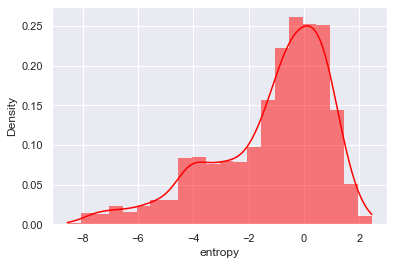

In [10]:
sns.set_theme(); 
x = data['entropy']
sns.histplot(x, color="red", label="variance", kde=True, stat="density", linewidth=0)

### Identifying Predictive Power of Features

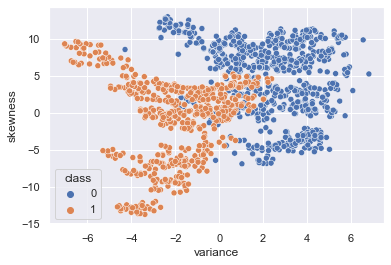

In [11]:
sns.scatterplot(data = data, x = "variance", y = "skewness", hue = "class")

plt.show()

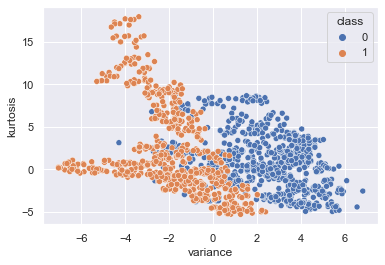

In [12]:
sns.scatterplot(data = data, x = "variance", y = "kurtosis", hue = "class")

plt.show()

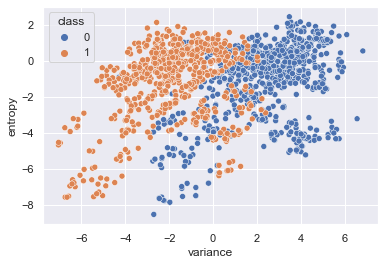

In [13]:
sns.scatterplot(data = data, x = "variance", y = "entropy", hue = "class")

plt.show()

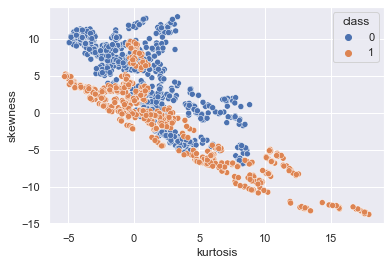

In [14]:
sns.scatterplot(data = data, x = "kurtosis", y = "skewness", hue = "class")

plt.show()

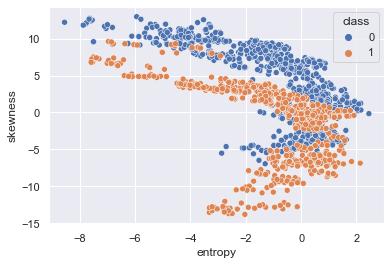

In [15]:
sns.scatterplot(data = data, x = "entropy", y = "skewness", hue = "class")

plt.show()

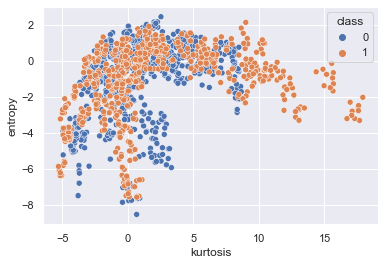

In [16]:
sns.scatterplot(data = data, x = "kurtosis", y = "entropy", hue = "class")

plt.show()

----
## Preparing the Data

### Normalizing Numerical Features 

In [17]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['variance', 'skewness', 'kurtosis', 'entropy']
scaler = MinMaxScaler()
features[numerical] = scaler.fit_transform(features[numerical])

display(features.head(n = 6))


,variance,skewness,kurtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362
5,0.822859,0.877275,0.057100,0.489711


### Shuffle and Split Data

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'classes' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.4, random_state = 5)

print("Shape of training data " + str(X_train.shape) )
print("Shape of testing data "+ str(X_test.shape) )
print("Shape of training label " + str(y_train.shape) )
print("Shape of testing label "+ str(y_test.shape) )

Shape of training data (823, 4)
Shape of testing data (549, 4)
Shape of training label (823,)
Shape of testing label (549,)


----
## Evaluating Model Performance

### Metrics and the Naive Predictor

In [19]:
# Calculate Accuracy
accuracy = float(n_fake_notes)/n_records

# Calculate F-Score with beta = 2
precision = accuracy
recall = 1
beta = 2
fscore = (1 + beta ** 2) * precision * recall /(beta ** 2 * precision + recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5554, F-score: 0.8620]


### Supervised Learning Models
We have chosen the following supervised learning models to build the trained models:
- Support Vector Machines (SVM)
- Gradient Boosting, an ensemble method
- K-Nearest Neighbors (KNeighbors)

### Implementation: Create Training and Prediction Pipeline

In [20]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    #beta=2
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    # then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=1)
    
    # Compute Confusion Matrix
    results['conf_mat'] = confusion_matrix(y_test, predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial Model Evaluation

In [21]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from math import ceil
from time import time

# Initialize the three models
clf_A = KNeighborsClassifier(n_neighbors = 5)
clf_B = SVC(random_state = 5)
clf_C = GradientBoostingClassifier(random_state = 5)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_5 = int(X_train.shape[0] * 0.05)
samples_20 = int(X_train.shape[0] * 0.2)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_5, samples_20, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

print ("\nTrain-Test Scores when trained on entire training set")
for key, value in results.items():
    print ("For {} Classifier, scores on training and test set are:".format(key))
    print ("Accuracy on Train set: {}".format(value[2]['acc_train']))
    print ("Accuracy on Test set: {}".format(value[2]['acc_test']))
    print ("F-score on Train set: {}".format(value[2]['f_train']))
    print ("F-score on Test set: {}".format(value[2]['f_test']))
    print ("Confusion Matrix for test set:\n {}".format(value[2]['conf_mat']))
# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

KNeighborsClassifier trained on 41 samples.
KNeighborsClassifier trained on 164 samples.
KNeighborsClassifier trained on 823 samples.
SVC trained on 41 samples.
SVC trained on 164 samples.
SVC trained on 823 samples.
GradientBoostingClassifier trained on 41 samples.
GradientBoostingClassifier trained on 164 samples.
GradientBoostingClassifier trained on 823 samples.

Train-Test Scores when trained on entire training set
For KNeighborsClassifier Classifier, scores on training and test set are:
Accuracy on Train set: 1.0
Accuracy on Test set: 0.9981785063752276
F-score on Train set: 1.0
F-score on Test set: 0.9980353634577603
Confusion Matrix for test set:
 [[294   1]
 [  0 254]]
For SVC Classifier, scores on training and test set are:
Accuracy on Train set: 1.0
Accuracy on Test set: 1.0
F-score on Train set: 1.0
F-score on Test set: 1.0
Confusion Matrix for test set:
 [[295   0]
 [  0 254]]
For GradientBoostingClassifier Classifier, scores on training and test set are:
Accuracy on Train

### Featue Importance

In [30]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 5)
# Train the supervised model on the training set 
model = clf.fit(X_train, y_train)

# Extract the feature importances
importances = model.feature_importances_

print ("Feature Importances with regard to Random Forest Classifier:")
print (importances)
print ("Feature Importances with regard to Gradient Boosting Classifier:")
print (clf_C.feature_importances_)

Feature Importances with regard to Random Forest Classifier:
[0.24 0.28 0.4  0.08]
Feature Importances with regard to Gradient Boosting Classifier:
[0.66918447 0.22385278 0.10323281 0.00372994]
